### Stock Market Prediction And Forecasting Using Stacked LSTM

In [73]:
### Keras and Tensorflow >2.0

In [74]:
### Data Collection
import pandas_datareader as pdr
key=""

In [75]:
df.to_csv('AAPL.csv')

In [76]:
import pandas as pd

In [77]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [78]:
df=yf.download('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [79]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519277,302220800
2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586556,260022000
2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859333,318292800
2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838935,394024400


In [80]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-19 00:00:00-05:00,134.080002,136.250000,133.770004,135.270004,135.270004,58280400
2023-01-20 00:00:00-05:00,135.279999,138.020004,134.220001,137.869995,137.869995,79972200
2023-01-23 00:00:00-05:00,138.119995,143.320007,137.899994,141.110001,141.110001,81760300
2023-01-24 00:00:00-05:00,140.309998,143.160004,140.300003,142.529999,142.529999,66435100
2023-01-25 00:00:00-05:00,140.889999,142.429993,138.809998,141.860001,141.860001,63130666


In [81]:
df1=df['Close']

In [82]:
df1

Date
2012-01-03 00:00:00-05:00     14.686786
2012-01-04 00:00:00-05:00     14.765714
2012-01-05 00:00:00-05:00     14.929643
2012-01-06 00:00:00-05:00     15.085714
2012-01-09 00:00:00-05:00     15.061786
                                ...    
2023-01-19 00:00:00-05:00    135.270004
2023-01-20 00:00:00-05:00    137.869995
2023-01-23 00:00:00-05:00    141.110001
2023-01-24 00:00:00-05:00    142.529999
2023-01-25 00:00:00-05:00    141.860001
Name: Close, Length: 2784, dtype: float64

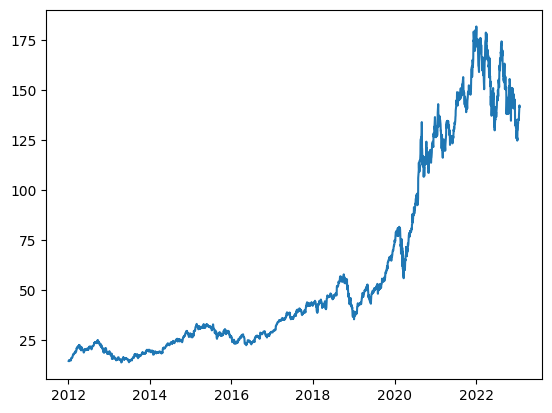

In [83]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [84]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [85]:
import numpy as np

In [86]:
df1

Date
2012-01-03 00:00:00-05:00     14.686786
2012-01-04 00:00:00-05:00     14.765714
2012-01-05 00:00:00-05:00     14.929643
2012-01-06 00:00:00-05:00     15.085714
2012-01-09 00:00:00-05:00     15.061786
                                ...    
2023-01-19 00:00:00-05:00    135.270004
2023-01-20 00:00:00-05:00    137.869995
2023-01-23 00:00:00-05:00    141.110001
2023-01-24 00:00:00-05:00    142.529999
2023-01-25 00:00:00-05:00    141.860001
Name: Close, Length: 2784, dtype: float64

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [88]:
print(df1)

[[0.00439887]
 [0.00486851]
 [0.00584391]
 ...
 [0.75663818]
 [0.76508741]
 [0.76110081]]


In [89]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [90]:
training_size,test_size

(1809, 975)

In [91]:
train_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.18313127],
       [0.18612125],
       [0.18731128]])

In [92]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [93]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [94]:
print(X_train.shape), print(y_train.shape)

(1708, 100)
(1708,)


(None, None)

In [95]:
print(X_test.shape), print(ytest.shape)

(874, 100)
(874,)


(None, None)

In [96]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [97]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [98]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
27/27 [==============================] - 11s 218ms/step - loss: 0.0016 - val_loss: 0.0162
Epoch 2/10
27/27 [==============================] - 4s 147ms/step - loss: 1.4391e-04 - val_loss: 0.0022
Epoch 3/10
27/27 [==============================] - 4s 142ms/step - loss: 8.1896e-05 - val_loss: 0.0025
Epoch 4/10
27/27 [==============================] - 4s 143ms/step - loss: 7.9534e-05 - val_loss: 0.0024
Epoch 5/10
27/27 [==============================] - 4s 142ms/step - loss: 7.6421e-05 - val_loss: 0.0028
Epoch 6/10
27/27 [==============================] - 4s 145ms/step - loss: 7.1351e-05 - val_loss: 0.0028
Epoch 7/10
27/27 [==============================] - 4s 143ms/step - loss: 6.9913e-05 - val_loss: 0.0037
Epoch 8/10
27/27 [==============================] - 4s 143ms/step - loss: 7.0374e-05 - val_loss: 0.0058
Epoch 9/10
27/27 [==============================] - 4s 144ms/step - loss: 6.2623e-05 - val_loss: 0.0053
Epoch 10/10
27/27 [==============================] - 4s 142ms/step 

In [102]:
import tensorflow as tf

In [103]:
tf.__version__

'2.11.0'

In [104]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 [==============================] - 1s 28ms/step


In [105]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [106]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

31.458689295302865

In [107]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

115.57791293574421

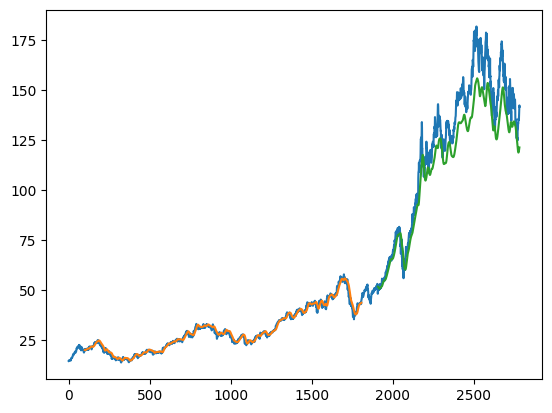

In [108]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [109]:
len(test_data)

975

In [110]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [111]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [112]:
temp_input

[0.8568985430313018,
 0.8441056283211489,
 0.8364894211192022,
 0.8449982079292162,
 0.836072956602652,
 0.8533878751739994,
 0.8894458760065426,
 0.8323837909822064,
 0.8411305445456274,
 0.8236370374187854,
 0.813700268503626,
 0.8361918945831797,
 0.8505912891616211,
 0.8316697999296337,
 0.8258386611514702,
 0.812093697842986,
 0.8141168238125278,
 0.8200074315809551,
 0.8085831207780352,
 0.764789883970666,
 0.7393231741155909,
 0.7646113862075229,
 0.7863295522442401,
 0.7881145298756717,
 0.782342860087772,
 0.7505689871553678,
 0.7525325533422941,
 0.7439642975420162,
 0.7401561939410428,
 0.7678245275288028,
 0.7403942514868014,
 0.7643734194541159,
 0.7723466221823488,
 0.7730011442446576,
 0.7702045582322793,
 0.793291237383878,
 0.8062625590648225,
 0.8234585396556422,
 0.8056675967851291,
 0.7785943162694141,
 0.8436891638045987,
 0.829408707206685,
 0.8134027419676035,
 0.7799628293842955,
 0.7433693352623229,
 0.7403942514868014,
 0.7436073020157299,
 0.7470584100904168,

In [113]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6500295]
101
1 day input [0.84410563 0.83648942 0.84499821 0.83607296 0.85338788 0.88944588
 0.83238379 0.84113054 0.82363704 0.81370027 0.83619189 0.85059129
 0.8316698  0.82583866 0.8120937  0.81411682 0.82000743 0.80858312
 0.76478988 0.73932317 0.76461139 0.78632955 0.78811453 0.78234286
 0.75056899 0.75253255 0.7439643  0.74015619 0.76782453 0.74039425
 0.76437342 0.77234662 0.77300114 0.77020456 0.79329124 0.80626256
 0.82345854 0.8056676  0.77859432 0.84368916 0.82940871 0.81340274
 0.77996283 0.74336934 0.74039425 0.7436073  0.74705841 0.71950911
 0.79091112 0.8077501  0.79930087 0.80977314 0.80233543 0.8138193
 0.81721085 0.7976943  0.81060616 0.81590189 0.79828936 0.77514321
 0.75699518 0.79781333 0.79947937 0.79650429 0.78948313 0.7673485
 0.75562667 0.7658014  0.76288588 0.77674978 0.78258092 0.76913357
 0.72920791 0.71736704 0.70463369 0.70421722 0.72296021 0.70380067
 0.70159913 0.69071032 0.66696916 0.68821126 0.69011526 0.66119749
 0.66887321 0.66089996 0.68827073 0.

In [114]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [115]:
import matplotlib.pyplot as plt

In [116]:
len(df1)

2784

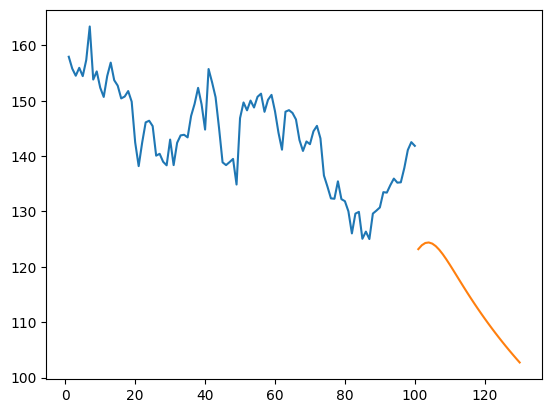

In [117]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

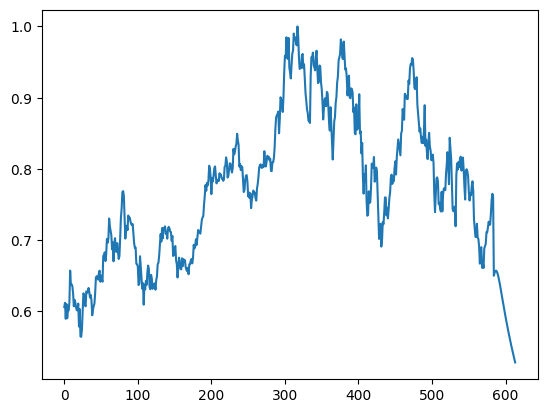

In [121]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2200:])

In [119]:
df3=scaler.inverse_transform(df3).tolist()

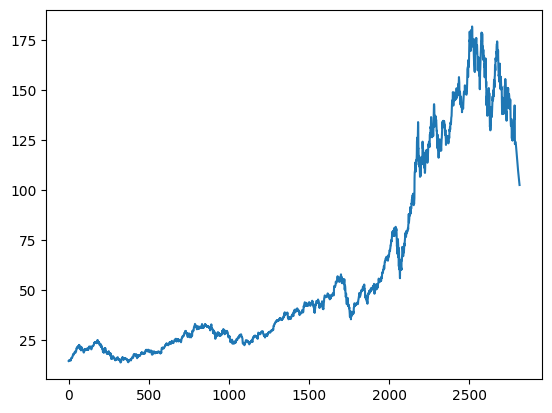

In [120]:
plt.plot(df3)